In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
# Step 1: Upload the dataset
uploaded = files.upload()


Saving dataset.csv to dataset (1).csv


In [5]:
# Step 2: Load the dataset
data = pd.read_csv("dataset.csv")

# Print the column names
print(data.columns)


Index(['Ratio', 'Angle 1', 'Angle 2', 'Name'], dtype='object')


In [8]:
# Step 3: Preprocess data
# Update these column names based on the actual column names in your dataset
X = data[['Ratio', 'Angle 1', 'Angle 2']]  # Selecting feature columns with correct names
y = data['Name']  # Selecting the label column

In [9]:
# Encode categorical target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(24, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [15]:
# Step 5: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Step 6: Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3091 - accuracy: 0.3958 - val_loss: 1.1168 - val_accuracy: 0.3125
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 1.2715 - accuracy: 0.4375 - val_loss: 1.1023 - val_accuracy: 0.3125
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1.2859 - accuracy: 0.4375 - val_loss: 1.0881 - val_accuracy: 0.3125
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 1.0951 - accuracy: 0.5312 - val_loss: 1.0740 - val_accuracy: 0.3125
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 1.0460 - accuracy: 0.5521 - val_loss: 1.0599 - val_accuracy: 0.3125
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 1.0053 - accuracy: 0.5781 - val_loss: 1.0462 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 37ms/step - loss: 0.8491 - accuracy: 0.6302 - val_loss: 1.0327 - val_accuracy: 0.3333
Epoch 8/100
1/1 [=====

In [17]:
# Step 7: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 8ms/step - loss: 0.3893 - accuracy: 0.9500
Test Accuracy: 0.9500


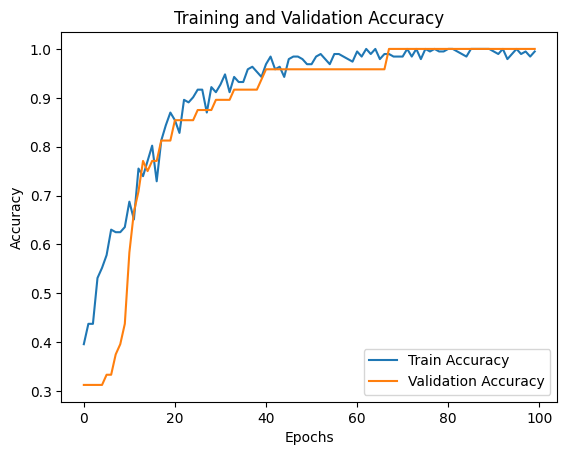

In [18]:
# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [19]:
# Step 6: Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [20]:
# Step 7: Train model with early stopping
history = model.fit(X_train, y_train,
                    epochs=100,  # Start with a higher number of epochs
                    batch_size=512,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
1/1 [==============================] - 0s 320ms/step - loss: 0.0686 - accuracy: 0.9948 - val_loss: 0.3579 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0772 - accuracy: 0.9896 - val_loss: 0.3538 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0836 - accuracy: 0.9948 - val_loss: 0.3497 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 98ms/step - loss: 0.0630 - accuracy: 0.9948 - val_loss: 0.3456 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 79ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 0.3415 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.3376 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 0.3336 - val_accuracy: 1.0000
Epoch 8/100
1/1 [

In [21]:
# Step 8: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 8ms/step - loss: 0.1296 - accuracy: 0.9833
Test Accuracy: 0.9833


In [22]:
# Print the number of epochs used
print(f'Training stopped after {len(history.epoch)} epochs')

Training stopped after 100 epochs


In [23]:
# Step 6: RE Train model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 0s 210ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 102ms/step - loss: 0.0388 - accuracy: 0.9948 - val_loss: 0.0950 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 124ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 0.0937 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 140ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 1.0000
Epoch 8/100
1/1 

In [24]:
# Step 8: Evaluate Re traine model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 21ms/step - loss: 0.0648 - accuracy: 0.9833
Test Accuracy: 0.9833


In [26]:
from sklearn.model_selection import GridSearchCV
# Assuming `model` is your trained model

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Decode the class labels if you used LabelEncoder
predicted_classes = label_encoder.inverse_transform(predicted_classes)

# Print some example predictions
for i in range(50):  # Print the first 10 predictions
    print(f"Predicted class: {predicted_classes[i]}, Actual class: {label_encoder.inverse_transform([y_test[i]])[0]}")


2/2 [==============================] - 0s 10ms/step
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Kenda, Actual class: Kenda
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Kenda, Actual class: Kenda
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Kenda, Actual class: Kenda
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Bakmee, Actual class: Bakmee
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Ginikenda, Actual class: Ginikenda
Predicted class: Bakmee, Actual class: